In [15]:
import torch
import matplotlib.pyplot as plt

## Learning Rate 

learning rate는 gradient의 보폭을 말한다. learning rate는 성능에 꽤나 영향을 주는 요소(learning rate를 잘못 설정하면 아예 학습이 안되기도 한다.)이기 때문에 learning rate를 어떻게 설정할 지가 중요

처음부터 끝까지 같은 learning rate를 사용할 수도 있지만, 학습과정에서 learning rate를 조정하는 learning rate scheduler를 사용할 수도 있다. 처음엔 큰 learning rate(보폭)으로 빠르게 optimize를 하고 최적값에 가까워질수록 learning rate(보폭)를 줄여 미세조정을 하는 것이 학습이 잘된다고 알려져있다. learning rate를 decay하는 방법이외에도 learning rate를 줄였다 늘렸다 하는 것이 더 성능향상에 도움이 된다는 연구결과도 있다. 

## LAMDA lr 

Lambda 표현식으로 작성한 함수를 통해 learning rate를 조절한다. 초기 learning rate에 lambda함수에서 나온 값을 곱해줘서 learning rate를 계산한다.

* optimizer: 이전에 정의한 optimizer 변수명을 넣어준다.
* lr_lambda: lr에 곱해질 factor를 정하는 함수

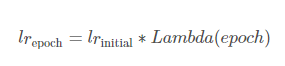

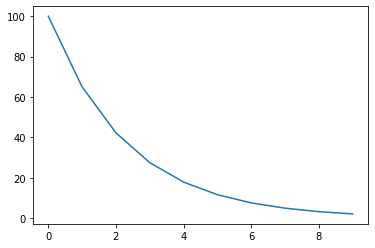

In [18]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
lambda1 = lambda epoch: 0.65 ** epoch
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)


lrs = []

for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(range(10),lrs)
plt.show()


## MultiplicativeLR
이전 Epoch에 따른 가중치로 lr 를 감소시키는 Scheduler 입나다.
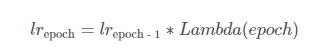

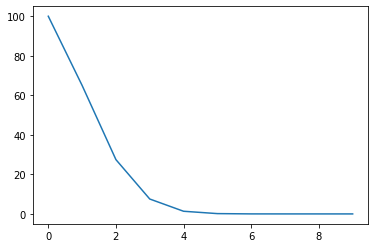

In [20]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
lmbda = lambda epoch: 0.65 ** epoch
scheduler = torch.optim.lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lmbda)
lrs = []

for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",0.95," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(range(10),lrs)
plt.show()

##  StepLR
step size마다 gamma 비율로 lr을 감소시킨다. (step_size 마다 gamma를 곱한다.)

* optimizer: 이전에 정의한 optimizer 변수명을 넣어준다.
* step_size: 몇 epoch마다 lr을 감소시킬지가 step_size를 의미한다.
* gamma: gamma 비율로 lr을 감소시킨다.


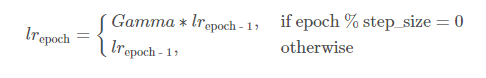



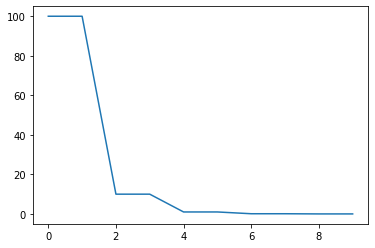

In [22]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)
lrs = []

for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",0.1 if i!=0 and i%2!=0 else 1," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(range(10),lrs)
plt.show()

##  MultiStepLR
step size가 아니라 learning rate를 감소시킬 epoch을 지정해줌  

* optimizer: 이전에 정의한 optimizer 변수명을 넣어준다.
* milestones: learning rate 줄일 epoch index의 list
* gamma: gamma 비율로 lr을 감소시킨다.

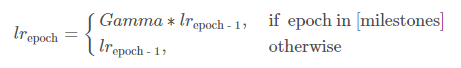

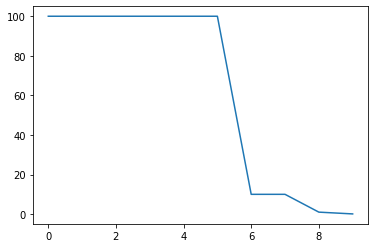

In [24]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[6,8,9], gamma=0.1)
lrs = []

for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",0.1 if i in [6,8,9] else 1," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(range(10),lrs)
plt.show()

## ExponentialLR

learing rate decay가 exponential함수를 따른다.

* optimizer: 이전에 정의한 optimizer 변수명을 넣어준다.
* gamma: lr을 감소시킬 때, 곱해지는 factor


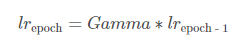

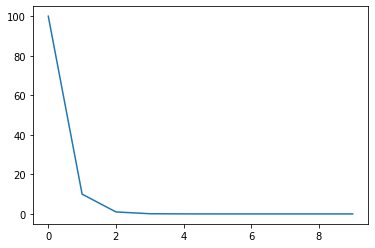

In [26]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.1)
lrs = []


for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",0.1," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)
plt.show()

## CosineAnnealingLR
learing rate가 cos함수를 따라서 eat_min까지 떨어졌다 다시 초기 learning rate까지 올라온다.

* optimizer: 이전에 정의한 optimizer 변수명을 넣어준다.
* T_max: 최대 iteration 횟수
* eta_min: 최소로 떨어질 수있는 learning rate default=0

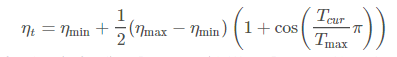

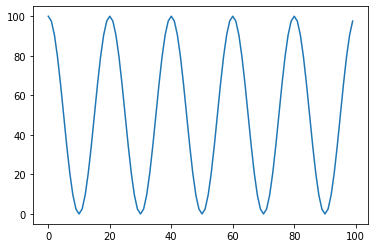

In [27]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=0)
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)
plt.show()

## CyclicLR

성능이 향상이 없을 때 learning rate를 감소시킨다. 그렇기 때문에 validation loss나 metric(평가지표)을 learning rate step함수의 input으로 넣어주어야 한다. 그래서 metric이 향상되지 않을 때, patience횟수(epoch)만큼 참고 그 이후에는 learning rate를 줄인다. optimizer에 momentum을 설정해야 사용할 수 있다.

* optimizer: 이전에 정의한 optimizer 변수명을 넣어준다.
* base_lr: 최소 lr
* max_lr: 최대 lr
* step_size_up: 증가하는 cycle의 반
* step_size_down: 감소하는 cycle의 반. 설정안하면 step_size_up과 동일하게 설정된다.
* mode: 'triangular', 'triangular2', 'exp_range' 중 택 1(아래 그림이 각각의 mode 의미함)
* gamma: 'exp_range' 모드일 때 scalefunction (gamma**cycle iteration)
* scale_fn: custom scaling할 수 있는 function 정의 이 옵션을 사용하면 mode무시
* scale_mode: 
* (cycle_momentum: True이면 momentum이 lr과 반대방향으로 cycle(base_momentum~max_momentum)
* base_momentum: 최소 momentum default:0.8
* max_momentum: 최대 momentum default:0.9

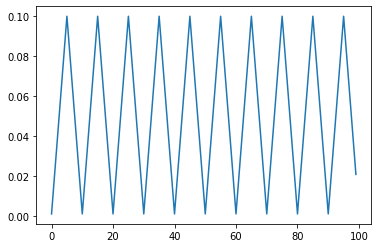

In [29]:
# CyclicLR - triangular
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1,step_size_up=5,mode="triangular")
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)
plt.show()

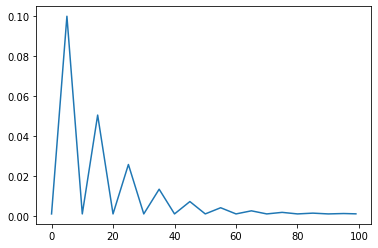

In [30]:
# CyclicLR - triangular2

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1,step_size_up=5,mode="triangular2")
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)
plt.show()

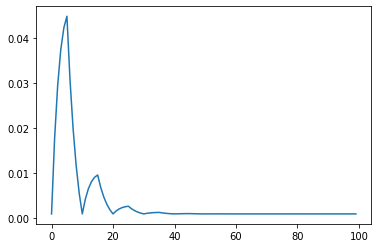

In [31]:
# CyclicLR - exp_range 

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1,step_size_up=5,mode="exp_range",gamma=0.85)
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)
plt.show()

## OneCycleLR
초기 learing rate에서 1cycle annealing하는 scheduler이다. 1주기 전략은 초기 learning rate에서 최대 learning rate까지 올라간 후 초기 learning rate보다 훨씬 낮은 learning rate로 annealing한다.  

* optimizer: 이전에 정의한 optimizer 변수명을 넣어준다.
* max_lr: 최대 lr
* total_steps: cycle의 total_steps
* epochs: 훈련할 epoch수
* steps_per_epoch: epoch당 step수
* pct_start: learning rate를 언제까지 증가시킬지 epoch에 대한 비율로 나타냄 default:0.3 ex)100epoch일 때, 30epoch까지 증가
* anneal_strategy: 'cos', 'linear' 중 택 1, default: cos
* cycle_momentum: learning rate와 반대로 momentum cycle
* base_momentum: 최소 momentum
* max_momentum: 최대 momentum
* div_factor: initial_lr = max_lr/div_factor 로 lr 초기화 default:25
* final_div_factor: min_lr = initial_lr/final_div_factor로 결정 default:1e-4

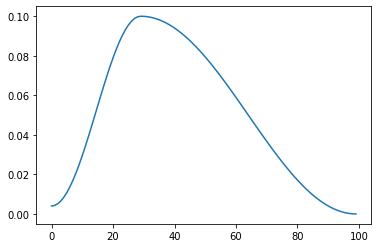

In [32]:
# OneCycleLR - cos

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=10, epochs=10)
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)
plt.show()

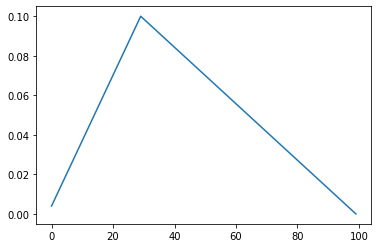

In [33]:
# OneCycleLR - linear

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=10, epochs=10,anneal_strategy='linear')
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)
plt.show()

## CosineAnnealingWarmRestarts


cosine annealing 함수를 따르면서 Ti epoch마다 다시 시작한다.

* optimizer: 이전에 정의한 optimizer 변수명을 넣어준다.
* T_0: 첫번째 restart를 위해 몇번 iteration이 걸리는가?
* T_mult: restart 후에 T_i를 증가시키는 factor
* eta_min: 최소 lr

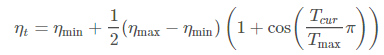

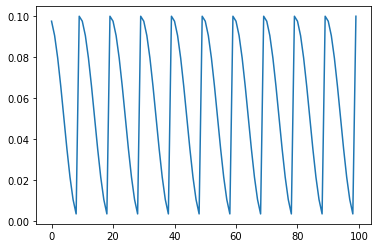

In [34]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
lr_sched = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=1, eta_min=0.001, last_epoch=-1)


lrs = []

for i in range(100):
    lr_sched.step()
    lrs.append(
        optimizer.param_groups[0]["lr"]
    )

plt.plot(lrs)
plt.show()

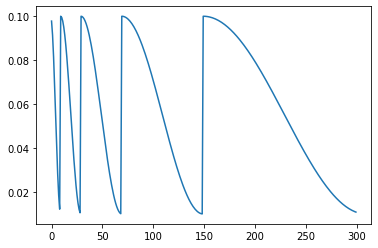

In [35]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
lr_sched = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=0.01, last_epoch=-1)


lrs = []

for i in range(300):
    lr_sched.step()
    lrs.append(
        optimizer.param_groups[0]["lr"]
    )

plt.plot(lrs)